# Análise Exploratória de Acidentes em Rodovias Brasileiras

![PRF](images/prf-background.png)

A segurança rodoviária é uma questão de alta relevância para a segurança pública e a proteção da vida nas estradas. O número de sinistros em rodovias brasileiras representa um desafio significativo, com impactos diretos na qualidade de vida dos cidadãos. Compreender as causas relacionadas aos acidentes pode fornecer informações valiosas para a formulação de políticas mais eficazes, visando reduzir a frequência e a gravidade dos acidentes.

---

## Objetivo do Estudo

Realizar uma análise exploratória dos dados para identificar padrões relacionados aos acidentes, incluindo a frequência e os fatores que contribuem para esses eventos. A partir dessa análise, buscaremos responder as questões-chave sobre a segurança nas rodovias e fornecer recomendações baseadas em dados para melhorar a prevenção de acidentes.

## 1. Coletando os dados
A base de dados foi extraída do site oficial da <a href="https://www.gov.br/prf/">PRF</a>,  através da elaboração do <a href="https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf">Plano de Dados Abertos da PRF</a>. São disponibilizados dados institucionais, em formato legível por máquina e sem restrição de licenças, patentes ou mecanismos de controle, que qualquer pessoa pode livremente usar, reutilizar e redistribuir.

### 1.1 Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import branca.colormap as branca_cm
import folium
import os

### 1.2 Leitura da base de dados

In [3]:
dataframe = pd.read_csv('base/datatran2023.csv', sep = ';', encoding='Latin-1')
dataframe.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [4]:
print(f'A base de dados possui: \n{dataframe.shape[1]} colunas; \n{dataframe.shape[0]} linhas.')

A base de dados possui: 
30 colunas; 
67764 linhas.


### 1.3 Dicionário das variáveis

* **`id`** - Variável com valores numéricos, representando o identificador do acidente.
* **`data_inversa`** - Data da ocorrência no formato dd/mm/aaaa.
* **`dia_semana`** - Dia da semana da ocorrência.
* **`horário`** - Horário da ocorrência no formato hh:mm:ss.
* **`uf`** - Unidade da Federação.
* **`br`** - Variável com valores numéricos,representando o identificador da BR do acidente.
* **`km`** - Identificação do quilômetro onde ocorreu o acidente.
* **`municipio`** - Nome do município de ocorrência do acidente.
* **`causa_acidente`** - Identificação da causa principal do acidente.
* **`tipo_acidente`** - Identificação do tipo de acidente.
* **`classificação_acidente`** - Classificação quanto à gravidade do acidente.
* **`fase_dia`** - Fase do dia no momento do acidente.
* **`sentido_via`** - Sentido da via considerando o ponto de colisão.
* **`condição_meteorologica`** - Condição meteorológica no momento do acidente.
* **`tipo_pista`** - Tipo da pista considerando a quantidade de faixas.
* **`tracado_via`** - Descrição do traçado da via.
* **`uso_solo`** - Descrição sobre as características do local do acidente: Urbano = Sim; Rural = Não.
* **`pessoas`** - Total de pessoas envolvidas na ocorrência.
* **`mortos`** - Total de pessoas mortas envolvidas na ocorrência.
* **`feridos_leves`** - Total de pessoas com ferimentos leves envolvidas na ocorrência.
* **`feridos_graves`** - Total de pessoas com ferimentos graves envolvidas na ocorrência.
* **`ilesos`** - Total de pessoas ilesas envolvidas na ocorrência.
* **`ignorados`** - Total de pessoas envolvidas na ocorrência e que não se soube o estado físico.
* **`feridos`** - Total de pessoas feridas envolvidas na ocorrência (soma dos feridos leves com os graves).
* **`veiculos`** - Total de veículos envolvidos na ocorrência.
* **`latitude`** - Latitude do local do acidente em formato geodésico decimal.
* **`longitude`** - Longitude do local do acidente em formato geodésico decimal.
* **`regional`** - Superintendência regional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.
* **`delegacia`** - delegacia da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.
* **`uop`** - Unidade operacional da PRF cujo acidente ocorreu dentro dos limites de sua circunscrição.

## 2. Limpeza dos dados
Vamos compreender as variáveis e a saúde dos dados extraídos. Esta etapa é de suma importância para veracidade e compreensão dos resultados obtidos na análise exploratória dos dados.

<blockquote><b>Nota: Em caso de dúvidas, consulte o tópico 1.3 para descrição sucinta das variáveis presentes nos conjuntos de dados.</b></blockquote>

### 2.1 Exclusão de variáveis redundantes/dispensáveis
Analisando o conjunto de variáveis presentes na base de dados, identificamos algumas que não serão úteis para a análise e, portanto, serão removidas:

In [5]:
dataframe = dataframe.drop(['regional','delegacia','uop','tracado_via','km','tipo_pista', 'sentido_via'], axis=1)

### 2.2 Tratamento de linhas duplicadas
A verificação de dados duplicados em um conjunto de dados é essencial para garantir a integridade dos resultados analíticos:

In [6]:
print(f"A base de dados possui {dataframe.duplicated().sum()} linhas duplicadas.")

A base de dados possui 0 linhas duplicadas.


### 2.3 Tratamento de valores nulos
Verificar dados ausentes também é crucial para assegurar a veracidade da análise: 

In [7]:
dataframe.isna().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    1
fase_dia                  0
condicao_metereologica    0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

Ao considerar a quantidade inexpressiva, vamos realizar a remoção do registro visto na varíavel **classificacao_acidente**:

In [8]:
dataframe = dataframe[dataframe['classificacao_acidente'].notna()]

### 2.4 Conversão de tipos

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67763 entries, 0 to 67763
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      67763 non-null  int64 
 1   data_inversa            67763 non-null  object
 2   dia_semana              67763 non-null  object
 3   horario                 67763 non-null  object
 4   uf                      67763 non-null  object
 5   br                      67763 non-null  int64 
 6   municipio               67763 non-null  object
 7   causa_acidente          67763 non-null  object
 8   tipo_acidente           67763 non-null  object
 9   classificacao_acidente  67763 non-null  object
 10  fase_dia                67763 non-null  object
 11  condicao_metereologica  67763 non-null  object
 12  uso_solo                67763 non-null  object
 13  pessoas                 67763 non-null  int64 
 14  mortos                  67763 non-null  int64 
 15  feridos

É possível verificar algumas inconsistências:
* Varíaveis de **data** e **horário** no tipo **_object_**.
* Variáveis **latitude** e **longitude** no tipo **_object_**. Temos que realizar a conversão para construir análises geoespaciais.
* Variável **br** como **_int64_**. Partindo que não iremos realizar nenhum cálculo usando-a, realizaremos a conversão.

In [10]:
dataframe['data_inversa'] = pd.to_datetime(dataframe['data_inversa'])

dataframe['horario'] = pd.to_datetime(dataframe['horario'], format='%H:%M:%S').dt.hour

In [11]:
dataframe['longitude'] = dataframe['longitude'].str.replace(',', '.').astype(float)

dataframe['latitude'] = dataframe['latitude'].str.replace(',', '.').astype(float)

In [12]:
dataframe['br'] = dataframe['br'].astype(str)

In [13]:
dataframe.dtypes.sort_values()

horario                            int32
id                                 int64
veiculos                           int64
feridos                            int64
ignorados                          int64
ilesos                             int64
feridos_graves                     int64
feridos_leves                      int64
mortos                             int64
pessoas                            int64
latitude                         float64
longitude                        float64
data_inversa              datetime64[ns]
uso_solo                          object
classificacao_acidente            object
tipo_acidente                     object
causa_acidente                    object
municipio                         object
br                                object
uf                                object
dia_semana                        object
fase_dia                          object
condicao_metereologica            object
dtype: object

### 2.5 Ajuste de variáveis

Nesta etapa, é importante gerenciar algumas variáveis para gerar visualizações que facilitarão a análise:

In [14]:
#Ajustando 'uso_solo'
dataframe['uso_solo'] = dataframe['uso_solo'].replace({'Sim': 'Urbano', 'Não': 'Rural'})

In [15]:
#Criação de variável 'mes'
dataframe['mes'] = dataframe['data_inversa'].dt.month_name()
dataframe['mes'].tail()

67759    December
67760         May
67761    December
67762    December
67763        July
Name: mes, dtype: object

In [16]:
#Criação de variável 'regiao'
dict_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 
    'AP': 'Norte', 'AM': 'Norte', 
    'BA': 'Nordeste', 'CE': 'Nordeste',
    'DF': 'Centro-Oeste', 'ES': 'Sudeste', 
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 
    'MT': 'Centro-Oeste','MS': 'Centro-Oeste', 
    'MG': 'Sudeste', 'PA': 'Norte', 
    'PB': 'Nordeste', 'PR': 'Sul', 
    'PE': 'Nordeste','PI': 'Nordeste', 
    'RJ': 'Sudeste', 'RN': 'Nordeste', 
    'RS': 'Sul', 'RO': 'Norte', 
    'RR': 'Norte','SC': 'Sul', 
    'SP': 'Sudeste', 'SE': 'Nordeste', 
    'TO': 'Norte'}

regioes = pd.DataFrame(list(dict_regiao.items()), columns=['uf', 'regiao'])
dataframe['regiao'] = dataframe['uf'].map(dict_regiao)
dataframe['regiao'].head()

0    Sudeste
1    Sudeste
3        Sul
4    Sudeste
5    Sudeste
Name: regiao, dtype: object

In [17]:
#Índices
acidentes_mes = dataframe['mes'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']) 

acidentes_semana = dataframe['dia_semana'].value_counts().reindex([
    'domingo', 'segunda-feira', 'terça-feira', 'quarta-feira', 
    'quinta-feira', 'sexta-feira', 'sábado'])

df_ca = dataframe.groupby(['causa_acidente', 'classificacao_acidente']).size().reset_index(name='contagem')
rank_ca = df_ca.groupby('causa_acidente')['contagem'].sum().nlargest(10).index

df_rank_ca = df_ca[df_ca['causa_acidente'].isin(rank_ca)].copy()
df_rank_ca.loc[:, 'causa_acidente'] = pd.Categorical(df_rank_ca['causa_acidente'], categories=rank_ca, ordered=True)
df_rank_ca = df_rank_ca.sort_values('causa_acidente')

## 3. Análise dos Dados

Finalmente, nesta etapa será realizada a análise dos dados recém tratados. Ao decorrer do processo, serão respondidas perguntas cruciais para conclusão do objetivo do projeto.

### 3.1 Resumo estatístico

Criando uma função para cálculo de frequências:

In [18]:
def calc_frequencias(df, var):
    
    frequencia_absoluta = df[var].value_counts()    
    total_ocorrencias = frequencia_absoluta.sum()
    frequencia_relativa = (frequencia_absoluta / total_ocorrencias) * 100
    
    tabela = pd.DataFrame({
        'Frequência Absoluta': frequencia_absoluta,
        'Frequência Relativa (%)': frequencia_relativa
    }).reset_index()
    
    tabela.columns = [var, 'Frequência Absoluta', 'Frequência Relativa (%)']

    return tabela

Criando uma função para cálculo de aumento percentual:

In [19]:
def calc_crescimento_perct(df, var, val1, val2):

    count_val1 = df[df[var] == val1].shape[0]
    count_val2 = df[df[var] == val2].shape[0]

    crescimento_percentual = ((count_val2 - count_val1) / count_val1) * 100
    
    return crescimento_percentual

Vamos realizar um resumo estatístico das principais variáveis numéricas da base de dados:

In [20]:
dataframe.describe()

,id,data_inversa,horario,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,67763.000000,67763,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000,67763.000000
mean,535106.165282,2023-07-06 10:48:31.429541120,12.903989,2.615070,0.083039,0.878149,0.279695,1.063515,0.401384,1.157844,1.997875,-18.941349,-46.511045
min,496506.000000,2023-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-33.588291,-70.268638
25%,516202.000000,2023-04-08 00:00:00,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-25.156168,-50.292789
50%,535114.000000,2023-07-07 00:00:00,14.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-20.477694,-47.384265
75%,553972.500000,2023-10-06 00:00:00,18.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,-12.846663,-42.484498
max,610535.000000,2023-12-31 00:00:00,23.000000,95.000000,7.000000,61.000000,29.000000,61.000000,88.000000,62.000000,131.000000,4.476284,-34.828400
std,22061.728273,NaN,6.058657,2.290305,0.331304,1.103796,0.616685,1.809468,0.893041,1.228479,1.217110,7.682038,6.144667


A partir do resultado acima, podemos realizar algumas análises simples, como:
* Os acidentes, em média, envolvem de 2 a 3 pessoas.
* Os acidentes, em média, envolvem 2 veículos.
* Presença de valores máximos considerados "altos demais", em colunas como "pessoas" e "veiculos". Vamos verificar:

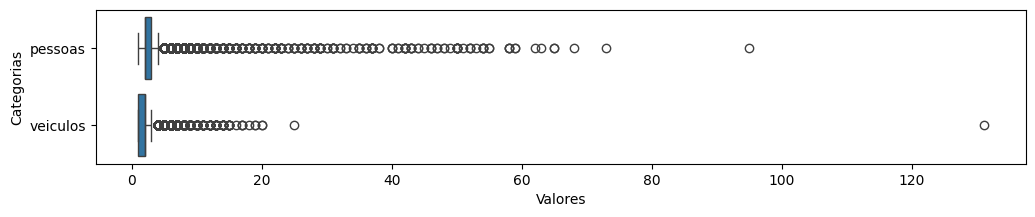

In [21]:
ver_outliers = dataframe.iloc[:,[13, 20]] #13 e 20 referem-se ao índice das colunas "pessoas" e "veiculos", respectivamente.
ver_outliers = ver_outliers[['pessoas', 'veiculos']].melt(var_name='Categorias', value_name='Valores')

plt.figure(figsize=(12, 2))
sns.boxplot(x='Valores', 
            y='Categorias', 
            data=ver_outliers, 
            orient='h')
plt.xlabel('Valores')
plt.ylabel('Categorias')
plt.show()

Podemos observar a presença de _outliers_ no gráfico. Porém, os fenômenos apresentados são concretos e atípicos. Uma vez que não representam dados inconsistentes, serão mantidos na análise.

Vamos visualizar a média de acidentes por dia:

In [22]:
acidentes_mean = dataframe.groupby('data_inversa').size().mean()
print(f"No Brasil, há uma média de aproximadamente {acidentes_mean:.0f} acidentes por dia.")

No Brasil, há uma média de aproximadamente 186 acidentes por dia.


### 3.2 Variáveis categóricas

Realizando verificação das varíaveis qualitativas:

In [23]:
var_object = dataframe.select_dtypes(include=['object'])
for var in var_object.columns:
    categorias = dataframe[var].unique()
    unicos = len(categorias)
    if unicos > 10:
        categorias_limitadas = categorias[:10]
        restantes = unicos - 10
        categorias_exibidas = ', '.join(map(str, categorias_limitadas)) + f' e outras {restantes} restantes...'
    else:
        categorias_exibidas = ', '.join(map(str, categorias))

    print(f'\nVariável: {var}')
    print(f'Categorias: {categorias_exibidas}')
    print(f'Quantidade de valores: {unicos}\n')
    print('-' * 80)


Variável: dia_semana
Categorias: domingo, segunda-feira, terça-feira, quarta-feira, quinta-feira, sexta-feira, sábado
Quantidade de valores: 7

--------------------------------------------------------------------------------

Variável: uf
Categorias: ES, SP, PR, MG, BA, RJ, RS, SC, PI, GO e outras 17 restantes...
Quantidade de valores: 27

--------------------------------------------------------------------------------

Variável: br
Categorias: 101, 116, 376, 262, 381, 465, 392, 316, 50, 365 e outras 109 restantes...
Quantidade de valores: 119

--------------------------------------------------------------------------------

Variável: municipio
Categorias: SOORETAMA, TAUBATE, ORTIGUEIRA, MANHUACU, CORREGO DANTA, MANDIRITUBA, CAMBUI, SERRINHA, SAO GONCALO DO RIO ABAIXO, NOVA IGUACU e outras 1816 restantes...
Quantidade de valores: 1826

--------------------------------------------------------------------------------

Variável: causa_acidente
Categorias: Ausência de reação do condutor, 

### 3.3 Análise de correlações
A análise de correlação é um processo essencial para compreender as relações entre diferentes variáveis. Vamos verificar os fenômenos que ocorrem simultaneamente:

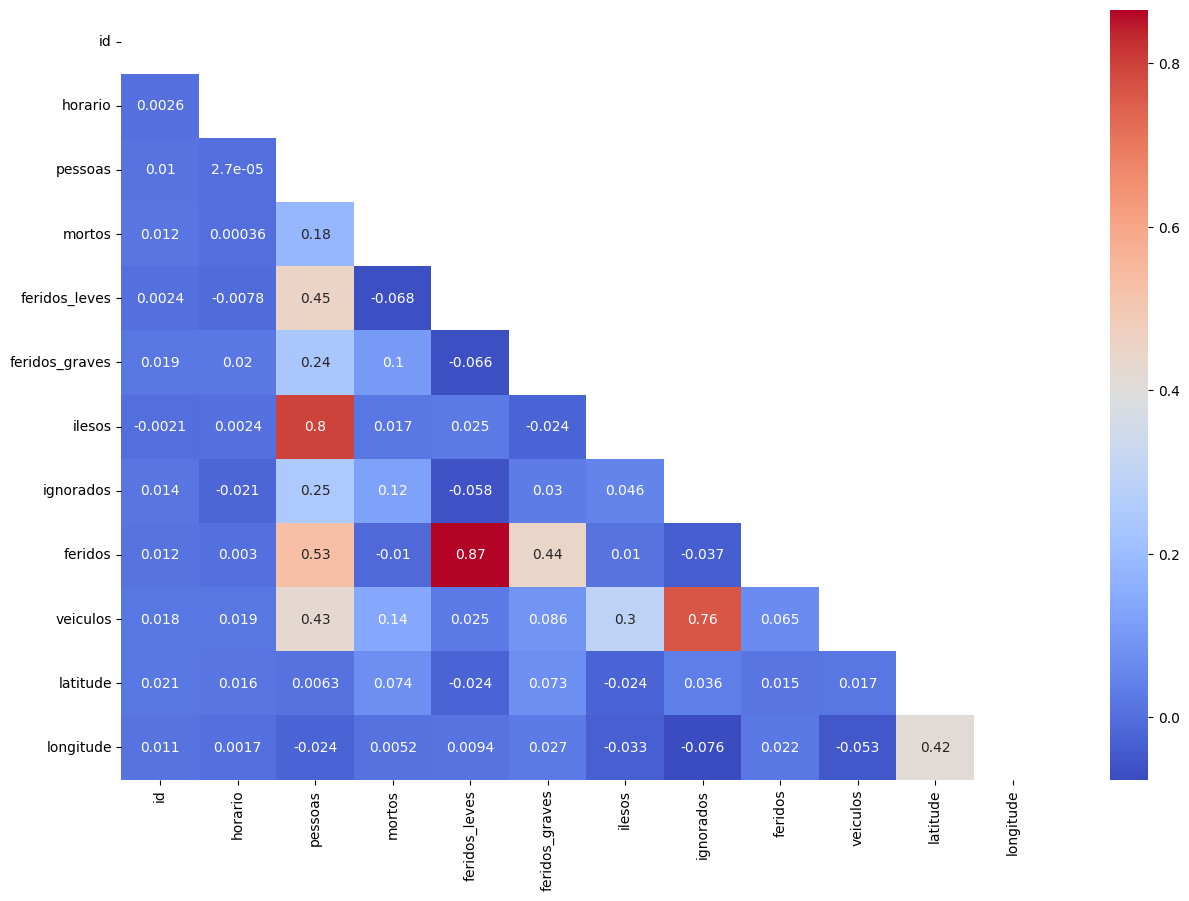

In [24]:
mask = np.triu(dataframe.corr(numeric_only=True))
plt.figure(figsize = (15, 10))
sns.heatmap(dataframe.corr(numeric_only=True), 
            cmap='coolwarm', 
            annot=True, 
            mask=mask)
plt.show()

Vamos analisar as correlações:
* O aumento do número de veículos no acidente sugere um aumento moderado no número de pessoas envolvidas.
* O alto índice entre **feridos_leves** e **feridos**, em comparação com **feridos_graves**, propõe que a maior parte dos feridos nos acidentes não se lesionam gravemente.
* Não há correlações negativas tão significativas.

#### 3.3.1 Gravidade dos acidentes em conjunto com suas condições meteorológicas

In [25]:
calc_frequencias(dataframe, 'classificacao_acidente')

,classificacao_acidente,Frequência Absoluta,Frequência Relativa (%)
0,Com Vítimas Feridas,51942,76.652450
1,Sem Vítimas,10963,16.178445
2,Com Vítimas Fatais,4858,7.169104


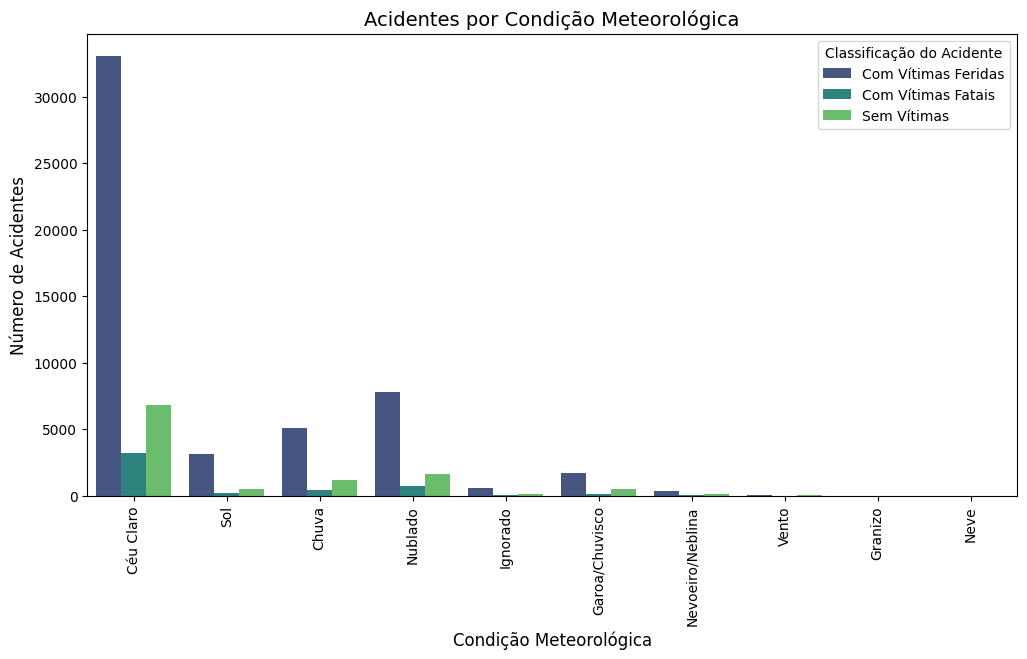

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataframe, 
              x='condicao_metereologica', 
              hue='classificacao_acidente', 
              palette='viridis')
plt.title('Condição Meteorológica em Acidentes')
plt.xticks(rotation=90)
plt.title('Acidentes por Condição Meteorológica', fontsize=14)
plt.xlabel('Condição Meteorológica', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Classificação do Acidente')
plt.show()

Os dados seguem o mesmo padrão e são mais frequentes em dias de Céu Claro. Porém, é notável comentar sobre o aumento do número de vítimas fatais quando há chuva, o que indica certa influência no quesito gravidade dos acidentes.

#### 3.3.2 Visualizando as principais causas de sinistro e sua gravidade

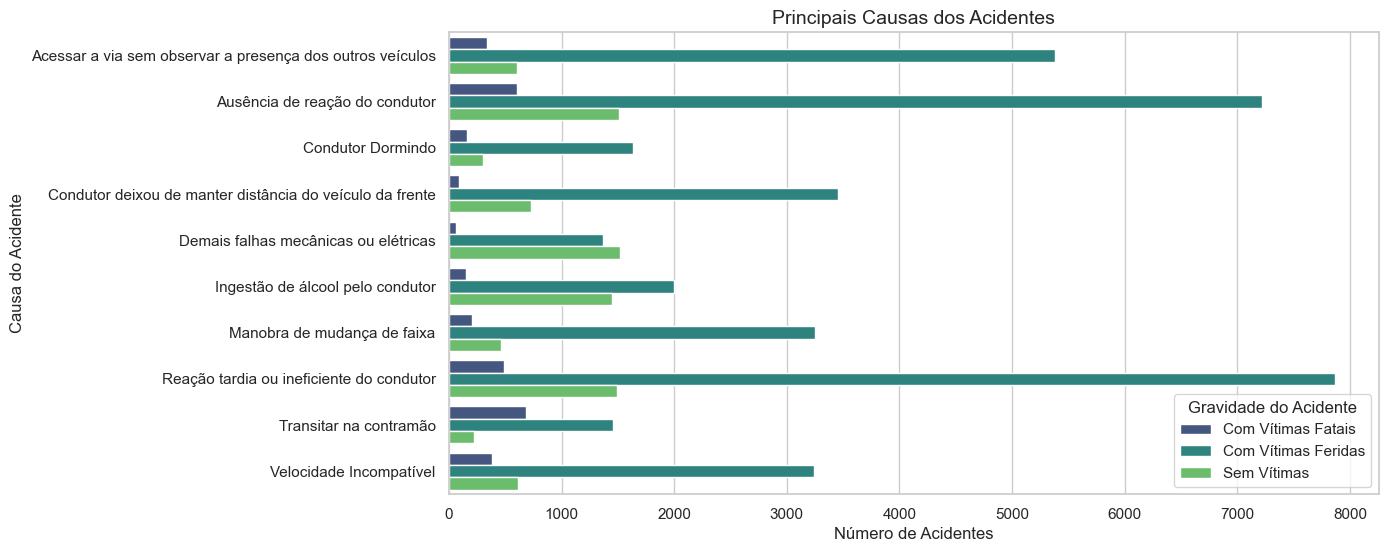

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_rank_ca,
    y='causa_acidente',
    x='contagem',
    hue='classificacao_acidente',
    palette='viridis',
    dodge=True)
plt.title('Principais Causas dos Acidentes', fontsize=14)
plt.xlabel('Número de Acidentes', fontsize=12)
plt.ylabel('Causa do Acidente', fontsize=12)
plt.legend(title='Gravidade do Acidente')
plt.show()

Um ponto relevante a destacar é que a maior parte das causas de sinistros está ligada ao condutor do veículo. Este fato sugere que o investimento em medidas socio-educativas, visando melhorias no comportamento dos condutores, pode resultar no aumento da prática da direção defensiva entre os envolvidos.

### 3.4 Análise temporal

Identificar as tendências temporais é crucial para definir padrões de comportamento dos dados, veremos:

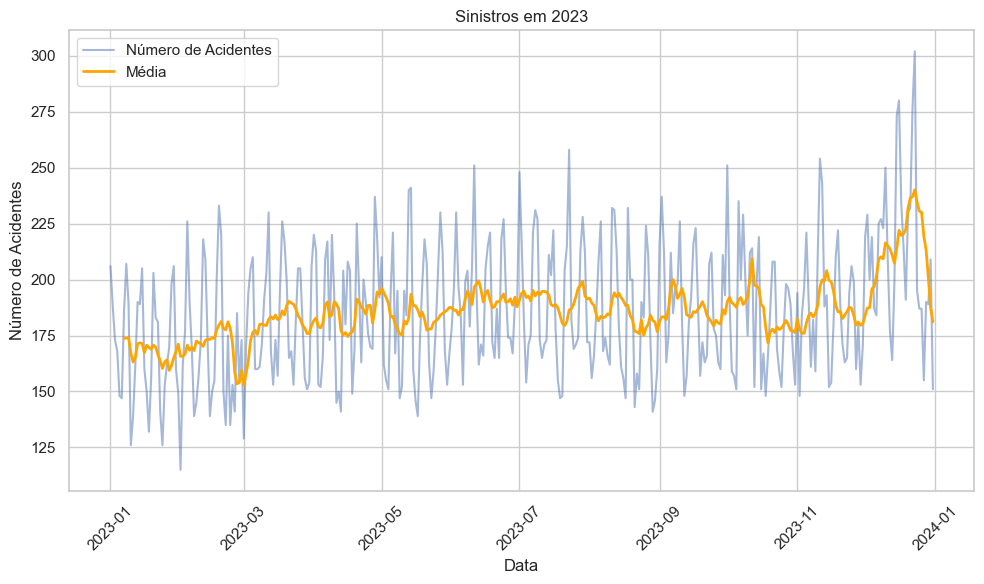

In [28]:
acidentes_date = dataframe.groupby('data_inversa').size()
acidentes_date_rolling = acidentes_date.rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(acidentes_date.index, 
         acidentes_date.values, 
         alpha=0.5, 
         label='Número de Acidentes')
plt.plot(acidentes_date.index, 
         acidentes_date_rolling, 
         color='orange', 
         linewidth=2, 
         label='Média')
plt.title('Sinistros em 2023')
plt.xlabel('Data')
plt.ylabel('Número de Acidentes')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Os dados possuem altas variações a curto prazo, o "ruído" presente no gráfico é perceptível. A média acrescentada ajuda a visualizar os padrões de forma mais clara.

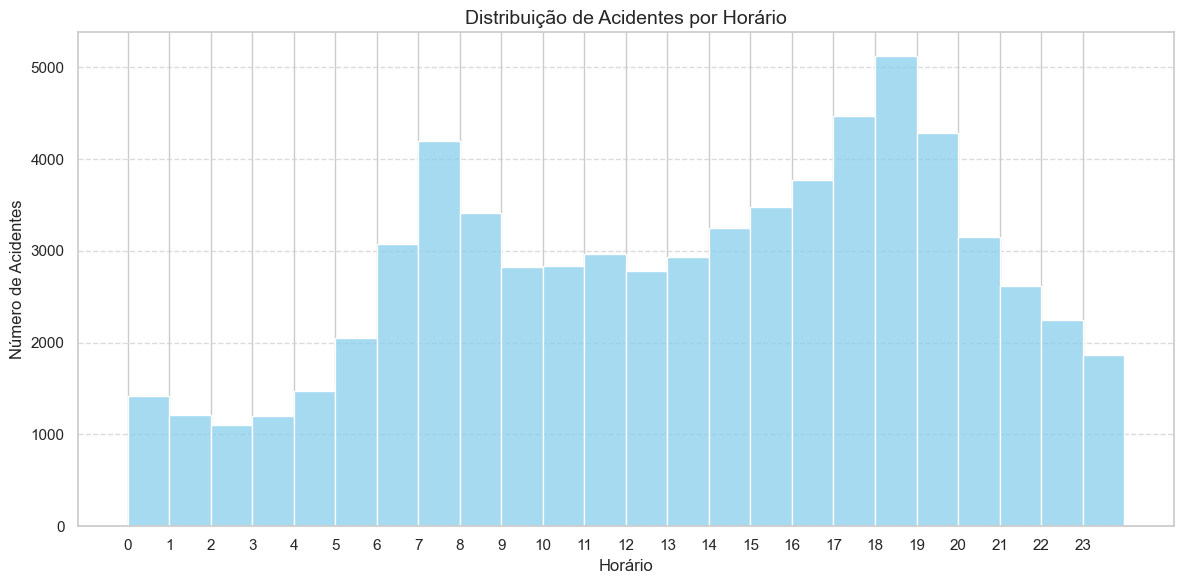

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dataframe, 
             x='horario', 
             bins=range(25), 
             kde=False, 
             color='skyblue')
plt.title('Distribuição de Acidentes por Horário', fontsize=14)
plt.xlabel('Horário', fontsize=12)
plt.ylabel('Número de Acidentes', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os acidentes se concentram principalmente nos horários de pico do Brasil, às 7 da manhã e entre 17h e 19h.

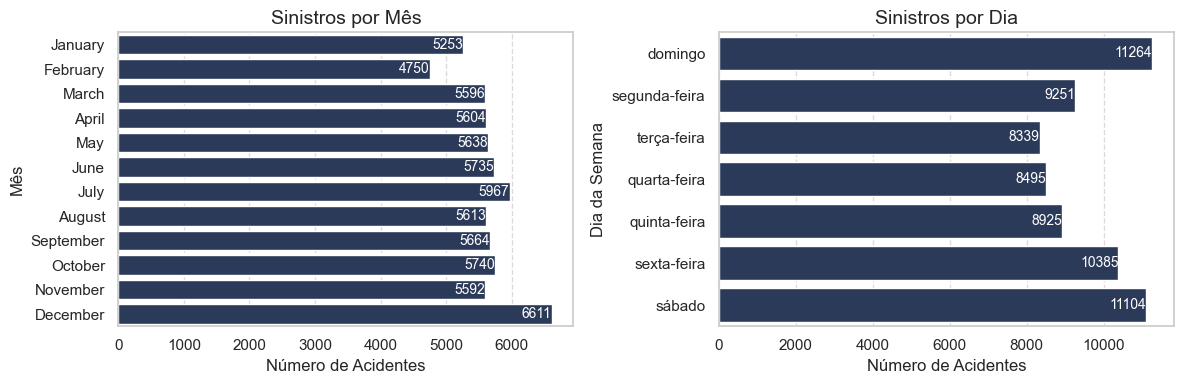

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.barplot(ax=axes[0], 
            y=acidentes_mes.index, 
            x=acidentes_mes.values, 
            color='#253760')
axes[0].set_title('Sinistros por Mês', fontsize=14)
axes[0].set_xlabel('Número de Acidentes', fontsize=12)
axes[0].set_ylabel('Mês', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
for bar in axes[0].patches:
    width = bar.get_width()
    axes[0].text(width - 0.5, bar.get_y() + bar.get_height() / 2, 
                 f'{width:.0f}', va='center', ha='right', fontsize=10, color='white')

sns.barplot(ax=axes[1], 
            y=acidentes_semana.index, 
            x=acidentes_semana.values, 
            color='#253760')
axes[1].set_title('Sinistros por Dia', fontsize=14)
axes[1].set_xlabel('Número de Acidentes', fontsize=12)
axes[1].set_ylabel('Dia da Semana', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
for bar in axes[1].patches:
    width = bar.get_width()
    axes[1].text(width - 0.5, bar.get_y() + bar.get_height() / 2, 
                 f'{width:.0f}', va='center', ha='right', fontsize=10, color='white')

plt.tight_layout()
plt.show()

In [31]:
perct_nov_dez = calc_crescimento_perct(dataframe, 'mes', 'November', 'December')

In [32]:
print(f'Em 2023, os acidentes ocorreram majoritariamente nos fins de semana, com alta em dezembro. Em relação ao mês de novembro para dezembro, houve um aumento significativo de {round(perct_nov_dez)}% de acidentes registrados.') 

Em 2023, os acidentes ocorreram majoritariamente nos fins de semana, com alta em dezembro. Em relação ao mês de novembro para dezembro, houve um aumento significativo de 18% de acidentes registrados.


### 3.5 Análise geoespacial

#### 3.5.1 Quais são as rodovias em que mais ocorrem acidentes?

In [33]:
calc_frequencias(dataframe, 'br').head()

,br,Frequência Absoluta,Frequência Relativa (%)
0,101,11634,17.168661
1,116,10803,15.942328
2,381,3288,4.852205
3,40,3263,4.815312
4,153,2550,3.763116


In [34]:
freq_relativa_br = (dataframe['br'].value_counts()/ dataframe['br'].value_counts().sum()) * 100
total_br = len(dataframe['br'].unique())
freq_br = freq_relativa_br.sort_values(ascending=False)[:2].sum()
print(f'Os acidentes possuem frequências maiores nas 2 principais rodovias do país, a BR-101 e a BR-116, representando cerca de {round(freq_br)}% dos sinistros. Ou seja, juntas concentram cerca de 1/3 dos acidentes. Vale lembrar que a base de dados possui {total_br} rodovias incluídas.')

Os acidentes possuem frequências maiores nas 2 principais rodovias do país, a BR-101 e a BR-116, representando cerca de 33% dos sinistros. Ou seja, juntas concentram cerca de 1/3 dos acidentes. Vale lembrar que a base de dados possui 119 rodovias incluídas.


#### 3.5.2 Quais são os estados em que mais ocorrem acidentes?

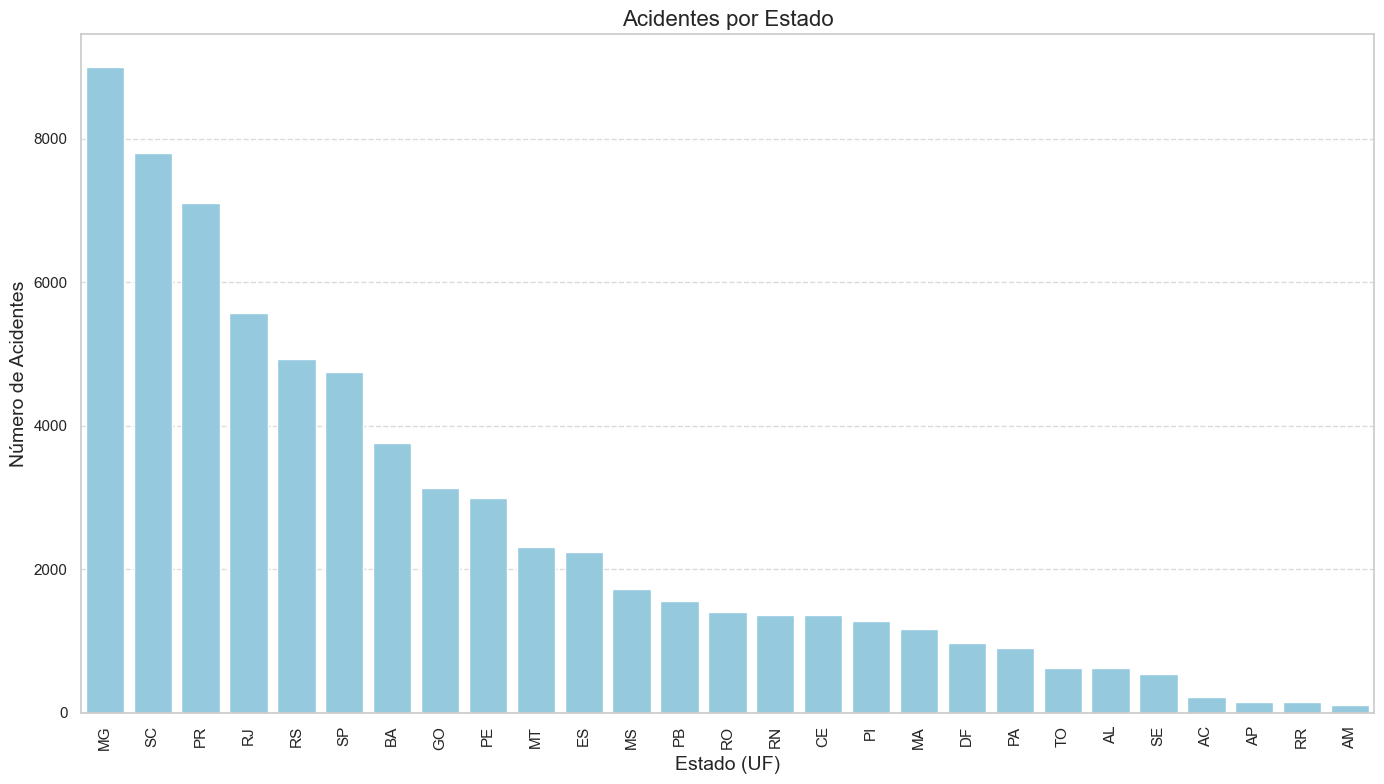

In [35]:
uf = dataframe['uf'].value_counts()
plt.figure(figsize=(14, 8))
sns.barplot(x=uf.index, 
            y=uf.values, 
            color ='skyblue')
plt.title('Acidentes por Estado', fontsize=16)
plt.xlabel('Estado (UF)', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xticks(rotation=90, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos agrupar de Estado para Região:

In [36]:
print(calc_frequencias(dataframe, 'regiao'))
freq_relativa_regiao = (dataframe['regiao'].value_counts()/ dataframe['regiao'].value_counts().sum()) * 100
freq_regiao = freq_relativa_regiao.sort_values(ascending=False)[:2].sum()

print(f'\nObservamos uma forte concentração de acidentes nas regiões Sul e Sudeste do país, representando cerca de {round(freq_regiao)}% dos sinistros.')

         regiao  Frequência Absoluta  Frequência Relativa (%)
0       Sudeste                21575                31.838909
1           Sul                19843                29.282942
2      Nordeste                14643                21.609138
3  Centro-Oeste                 8156                12.036067
4         Norte                 3546                 5.232944

Observamos uma forte concentração de acidentes nas regiões Sul e Sudeste do país, representando cerca de 61% dos sinistros.


Agora, por solo:

In [37]:
print(calc_frequencias(dataframe, 'uso_solo'))
freq_relativa_solo = (dataframe['uso_solo'].value_counts()/ dataframe['uso_solo'].value_counts().sum()) * 100
freq_solo = freq_relativa_solo.sort_values(ascending=False)[:1].sum()

print(f'\nOs acidentes também ocorrem em maior quantidade em ambientes rurais, representando aproximadamente {round(freq_solo)}%.')

  uso_solo  Frequência Absoluta  Frequência Relativa (%)
0    Rural                39320                58.025766
1   Urbano                28443                41.974234

Os acidentes também ocorrem em maior quantidade em ambientes rurais, representando aproximadamente 58%.


#### 3.5.3 Visualização de Mapa

In [38]:
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

<blockquote><b>Nota: A plataforma utilizada para versionamento de código não suporta a interação com os mapas da biblioteca Folium, e, portanto, foram anexadas imagens no Notebook para visualização. Caso queira interagir com os mapas criados, acesse os arquivos HTML no diretório /maps.</b></blockquote>

Mapa Clusterizado: À medida que você aproxima o mapa, os clusters se expandem, revelando os marcadores individuais.

In [ ]:
#FastMarkerCluster
callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"})
    marker= L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;  
};
"""
MC_PRFmap = folium.Map(location=[-14.0000, -52.0000], zoom_start=4, scrollWheelZoom=True, dragging=True)
marker_data = [[row['latitude'], row['longitude']] for index, row in dataframe.iterrows()]
FastMarkerCluster(marker_data, 
                  callback=callback).add_to(MC_PRFmap)
MC_PRFmap.save("maps/MarkerCluster.html")
MC_PRFmap

![FastMarkerClusterMap](images/MapaCluster.png)

--- 

Mapa de Calor: O mapa mostra a densidade de pontos geoespaciais dos locais em que ocorreram os sinistros.

In [ ]:
#HeatMap
HM_PRFmap = folium.Map(location=[-14.0000, -52.0000], zoom_start=4, scrollWheelZoom=True, dragging=True)
indices = [0, 0.3, 0.7, 1]
colormap = branca_cm.StepColormap(["green", "yellow", "red"],
                                  index=indices,
                                  caption="Índice - Mapa de Risco")

colormap.scale(0, 1).add_to(HM_PRFmap)
marker_data = [[row['latitude'], row['longitude']] for index, row in dataframe.iterrows()]
HeatMap(data=marker_data, 
        gradient={0: "green", 0.3: "yellow", 0.7: "red"}, 
        min_opacity=0.1, 
        radius=10, 
        blur=4, 
        name="Heatmap").add_to(HM_PRFmap)

folium.LayerControl(position="topleft").add_to(HM_PRFmap)

HM_PRFmap.save("maps/HeatMap.html")
HM_PRFmap

![HeatMap](images/MapaCalor.png)